In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [26]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [28]:
from pandas import ExcelFile

In [29]:
df = pd.read_excel('VN Index Historical Data.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,1417.08,1412.15,1417.27,1402.18,753.56K,0.0061
1,2021-07-02,1420.27,1422.89,1424.28,1415.82,706.83K,0.0023
2,2021-07-05,1411.13,1420.27,1421.52,1394.12,774.45K,-0.0064
3,2021-07-06,1354.79,1411.13,1418.99,1354.79,773.51K,-0.0399
4,2021-07-07,1388.55,1354.79,1388.55,1334.58,733.80K,0.0249


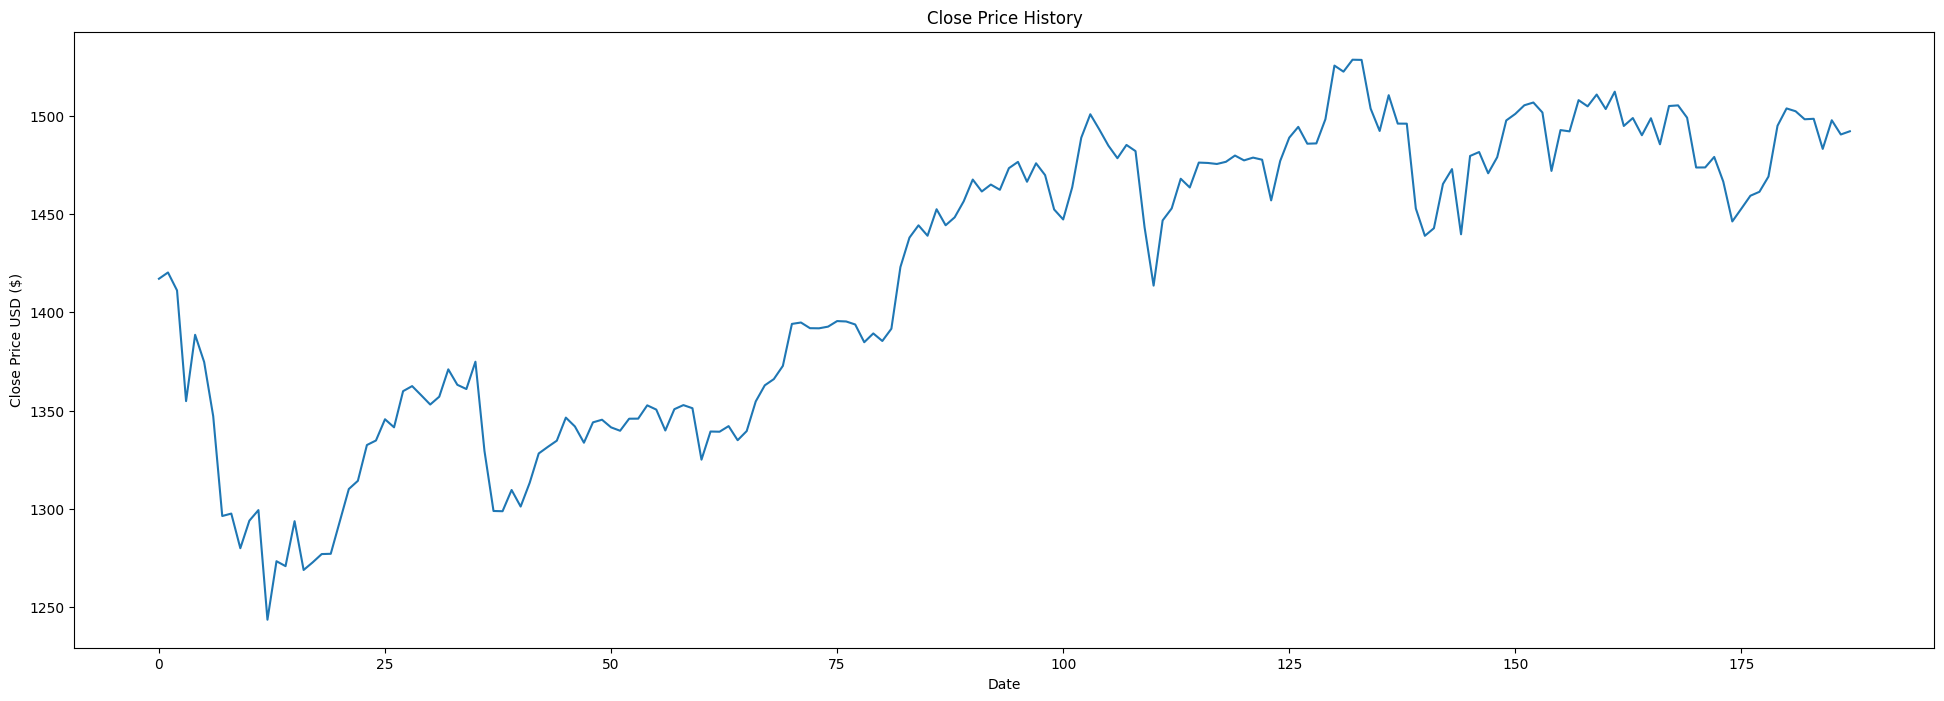

In [30]:
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [31]:
# Create a new dataframe with only the 'Price column 
data = df.filter(['Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset)) - 62)

training_data_len

126

In [32]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.60888936],
       [0.62007998],
       [0.58801656],
       [0.39037396],
       [0.50880516],
       [0.46014874],
       [0.3635375 ],
       [0.18518908],
       [0.18953904],
       [0.12769242],
       [0.17683996],
       [0.19574826],
       [0.        ],
       [0.10446923],
       [0.09569915],
       [0.17596296],
       [0.08882341],
       [0.10243458],
       [0.11723848],
       [0.1177296 ],
       [0.17571739],
       [0.23342454],
       [0.24805304],
       [0.31196941],
       [0.32003789],
       [0.35795973],
       [0.34357679],
       [0.40815969],
       [0.41717533],
       [0.40089806],
       [0.38426998],
       [0.39830211],
       [0.44709886],
       [0.41949063],
       [0.41194836],
       [0.46074511],
       [0.30141023],
       [0.19416965],
       [0.19374868],
       [0.23167053],
       [0.2020978 ],
       [0.24447485],
       [0.29688487],
       [0.30856662],
       [0.31972216],
       [0.36090648],
       [0.34515541],
       [0.316

In [33]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

predictions_days = 60

for i in range(predictions_days, len(train_data)):
    x_train.append(train_data[i-predictions_days:i, 0])
    y_train.append(train_data[i, 0])
    if i<= (predictions_days + 1):
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.60888936, 0.62007998, 0.58801656, 0.39037396, 0.50880516,
       0.46014874, 0.3635375 , 0.18518908, 0.18953904, 0.12769242,
       0.17683996, 0.19574826, 0.        , 0.10446923, 0.09569915,
       0.17596296, 0.08882341, 0.10243458, 0.11723848, 0.1177296 ,
       0.17571739, 0.23342454, 0.24805304, 0.31196941, 0.32003789,
       0.35795973, 0.34357679, 0.40815969, 0.41717533, 0.40089806,
       0.38426998, 0.39830211, 0.44709886, 0.41949063, 0.41194836,
       0.46074511, 0.30141023, 0.19416965, 0.19374868, 0.23167053,
       0.2020978 , 0.24447485, 0.29688487, 0.30856662, 0.31972216,
       0.36090648, 0.34515541, 0.31607381, 0.35245212, 0.3571178 ,
       0.34350663, 0.33743773, 0.35894198, 0.3590823 , 0.38283168,
       0.37525433, 0.33792886, 0.37595594, 0.38325265, 0.37767488])]
[0.28583456114502237]

[array([0.60888936, 0.62007998, 0.58801656, 0.39037396, 0.50880516,
       0.46014874, 0.3635375 , 0.18518908, 0.18953904, 0.12769242,
       0.17683996, 0.19574826, 0.  

In [34]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
66/66 [==============================] - 3s 13ms/step - loss: 0.0284
Epoch 2/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0073
Epoch 3/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0092
Epoch 4/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0064
Epoch 5/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0077
Epoch 6/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0081
Epoch 7/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0068
Epoch 8/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0064
Epoch 9/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0056
Epoch 10/25
66/66 [==============================] - 1s 15ms/step - loss: 0.0056
Epoch 11/25
66/66 [==============================] - 1s 15ms/step - loss: 0.0059
Epoch 12/25
66/66 [==============================] - 1s 15ms/step - loss: 0.0079
Epoch 13/25
66/66 [==================

In [35]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - predictions_days: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(predictions_days, len(test_data)):
    x_test.append(test_data[i-predictions_days:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 19ms/step


17.957131330071526

C:\Users\DELL\AppData\Local\Temp\ipykernel_34780\2294235708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


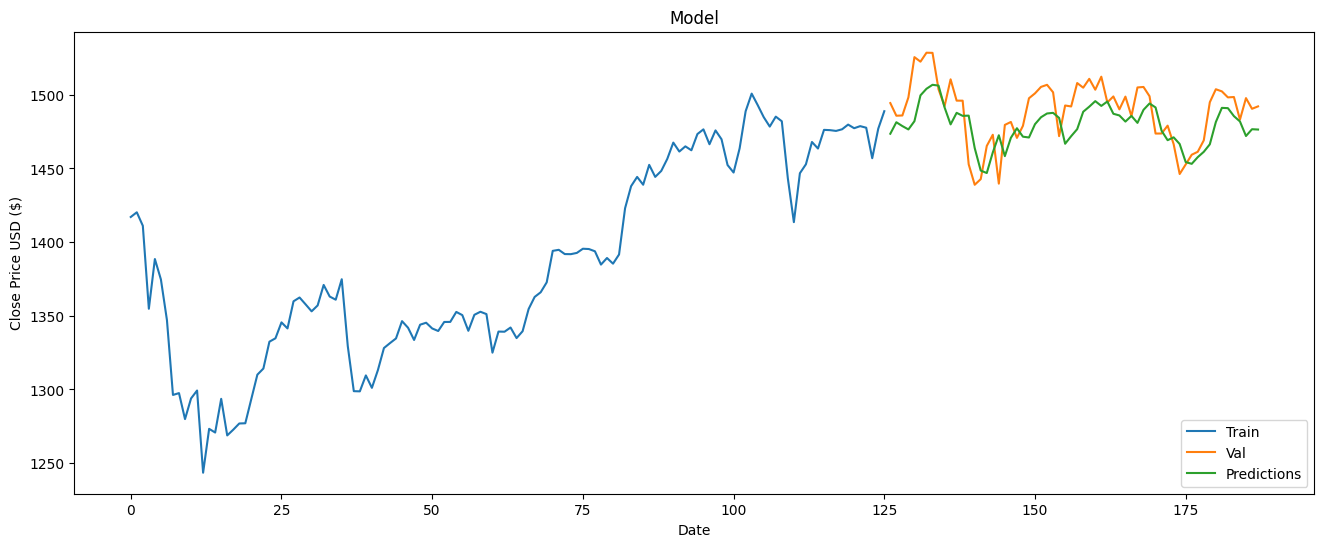

In [36]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()